<a href="https://colab.research.google.com/github/matheus-ramos-medeiros/ProjetoAirbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

A escolha de Paris para a análise de dados do Airbnb se justifica pela grande quantidade de opções de hospedagem disponíveis na cidade, o que permite a obtenção de insights valiosos sobre o mercado de acomodações para turistas.

Além disso, Paris é um dos destinos turísticos mais populares do mundo, o que cria uma grande demanda por hospedagem na cidade e torna o mercado competitivo, gerando informações relevantes sobre preços e oferta de acomodações em diferentes épocas do ano.

<center><img alt="Analisando Airbnb" width="100%" src="https://images2.alphacoders.com/528/528327.jpg"></center>

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/france/ile-de-france/paris/2023-03-13/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - O número de comentários que a listagem tem (nos últimos 12 meses)
* `license` - O número da licença/autorização/registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,124,15,332,2023-02-18,1.99,1,184,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,130,10,329,2023-03-15,2.26,2,171,30,7510400829623
2,7964,Sunny apartment with balcony,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,140,4,6,2015-09-14,0.04,1,48,0,7510903576564
3,81870,Saint Germain Musee d'orsay,152242,Delphine,NaN,Luxembourg,48.85558,2.33119,Entire home/apt,145,365,1,2012-01-07,0.01,79,0,0,NaN
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,264,0,"Available with a mobility lease only (""bail mo..."


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Nossa base de dados tem",df.shape[0],"linhas e",df.shape[1],"linhas.\n")

# verificar algumas informações como tipo de dados e dados nulos
print(df.info())


Nossa base de dados tem 56726 linhas e 18 linhas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56726 entries, 0 to 56725
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              56726 non-null  int64  
 1   name                            56689 non-null  object 
 2   host_id                         56726 non-null  int64  
 3   host_name                       56708 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   56726 non-null  object 
 6   latitude                        56726 non-null  float64
 7   longitude                       56726 non-null  float64
 8   room_type                       56726 non-null  object 
 9   price                           56726 non-null  int64  
 10  minimum_nights                  56726 non-null  int64  
 11  number_of_reviews               56726 non-

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending = False)


neighbourhood_group               1.000000
license                           0.329003
reviews_per_month                 0.195589
last_review                       0.195589
name                              0.000652
host_name                         0.000317
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

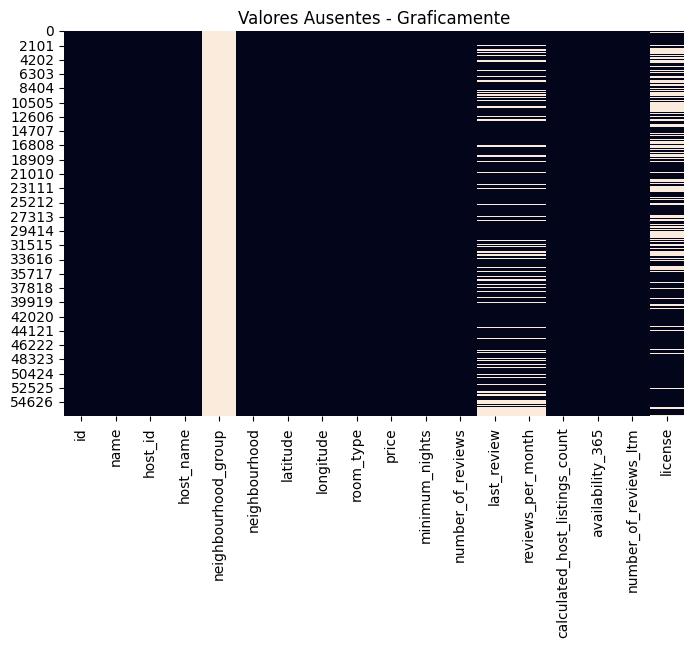

In [6]:
#Plotar graficamente os valores nulos
Valores_Ausentes = df.isnull()
plt.figure(figsize=(8,5))
plt.title("Valores Ausentes - Graficamente")
sns.heatmap(Valores_Ausentes,cbar = False);

Podemos perceber que a coluna `neighbourhood_group` esta com todos os dados nulos então poderiamos excluir ele da nossa base por exemplo.

Analisando as outras colunas a `reviews_per_month` e a `last_review` te o mesmo percentual de valores ausentes por ser um campo que o usuário teria que preencher.

Sobre a `license` são os casos das propriedades não terem cadastrados o número da licença/registro.

###**Qual o tipo de distribuição das variáveis?** 

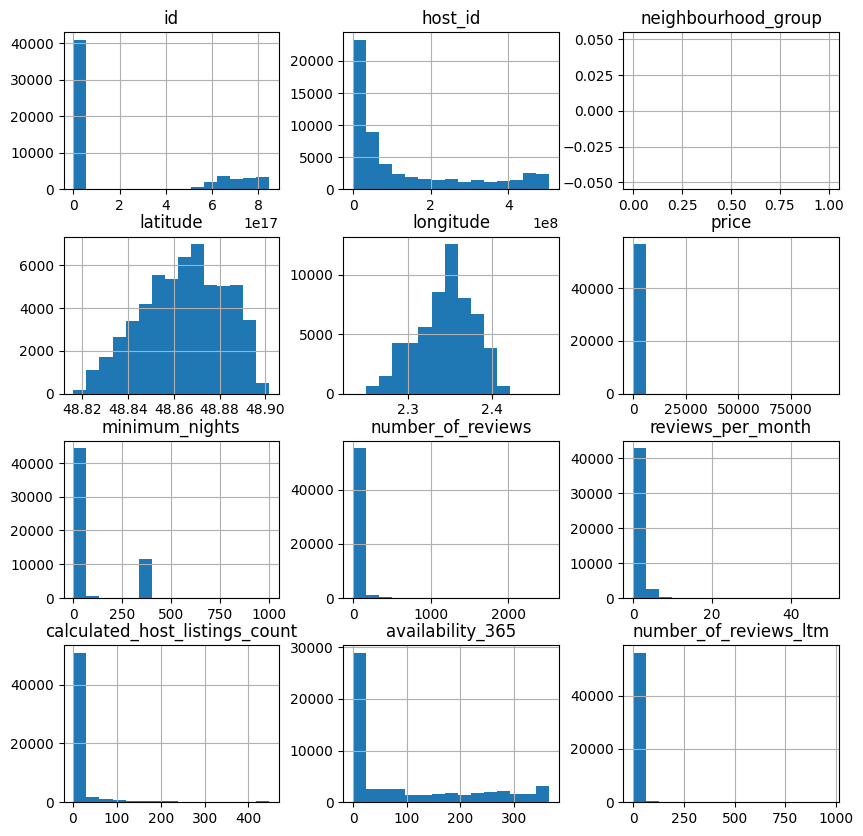

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(10,10));

Verificamos nos gráficos que existe alguns outliers em alguns campos como na coluna `minimum_nights` e no `price`.

### **Qual a média dos preços de aluguel?**

In [8]:
# Pegando os valors numericos importantes e verificando a estatistica das colunas
df.select_dtypes(exclude=['object'])[['price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count']].describe().T


,count,mean,std,min,25%,50%,75%,max
price,56726.0,171.991080,598.279546,0.00,73.00,110.00,180.00,93000.00
minimum_nights,56726.0,80.673571,145.470062,1.00,2.00,3.00,30.00,1000.00
number_of_reviews,56726.0,24.800709,54.452974,0.00,1.00,7.00,24.00,2524.00
reviews_per_month,45631.0,1.009644,1.362947,0.01,0.16,0.52,1.33,49.55
calculated_host_listings_count,56726.0,15.104643,51.584652,1.00,1.00,1.00,2.00,447.00


O conjunto de dados apresenta uma grande dispersão nos preços das acomodações, com uma ampla faixa de valores mínimo e máximo, assim como uma variação considerável no tempo mínimo de estadia, número de avaliações recebidas, taxa de avaliações por mês e quantidade de anúncios por host. Esses indicadores apontam para uma diversidade de características nas acomodações, como localização, comodidades oferecidas e políticas de estadia mínima adotadas.



### **Qual a correlação existente entre as variáveis**

In [9]:
# criar uma matriz de correlação
df_cor = df.select_dtypes(exclude=['object'])[['price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count']]
corr = df_cor.corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
price,1.000000,-0.059034,-0.001319,0.011706,0.039735
minimum_nights,-0.059034,1.000000,-0.176130,-0.293360,-0.095610
number_of_reviews,-0.001319,-0.176130,1.000000,0.574952,-0.043244
reviews_per_month,0.011706,-0.293360,0.574952,1.000000,0.057468
calculated_host_listings_count,0.039735,-0.095610,-0.043244,0.057468,1.000000


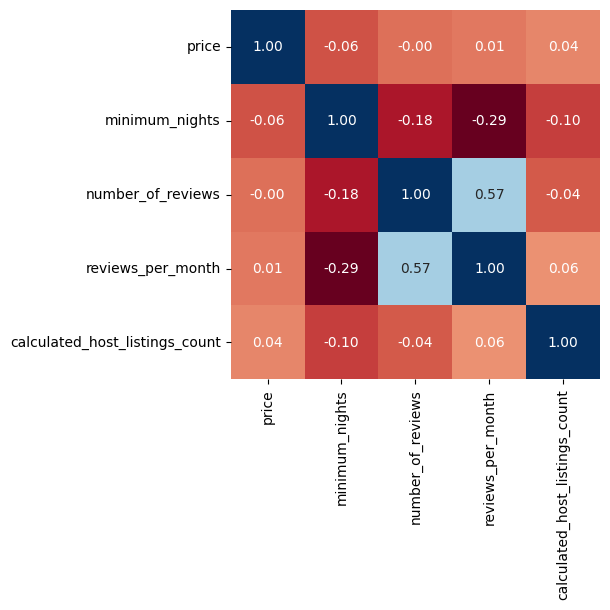

In [10]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='black', annot=True, cbar=False);

Verificamos que não temos muitas correlações nos nossos dados.

### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [11]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    48350
Private room        7172
Hotel room           915
Shared room          289
Name: room_type, dtype: int64

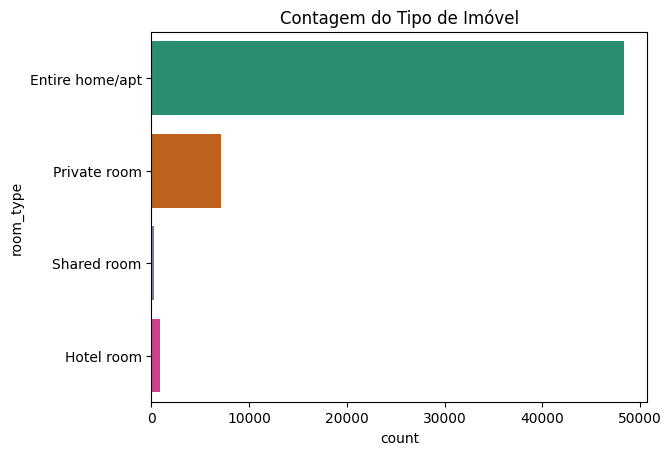

In [12]:
#plotar sobre o tipo de imovel
plt.title('Contagem do Tipo de Imóvel')
sns.countplot(data=df, y='room_type',palette = 'Dark2');

In [13]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts(normalize = True)


Entire home/apt    0.852343
Private room       0.126432
Hotel room         0.016130
Shared room        0.005095
Name: room_type, dtype: float64

### **Qual a localidade mais cara do dataset?**



In [14]:
# ver preços por bairros, na média
df.price.groupby(by = df['neighbourhood']).mean().sort_values(ascending = False)

neighbourhood
Élysée                 318.806575
Luxembourg             255.033254
Palais-Bourbon         253.695652
Louvre                 252.700962
Passy                  229.185931
Hôtel-de-Ville         223.071280
Bourse                 221.398941
Temple                 202.765667
Vaugirard              195.083138
Opéra                  187.090846
Panthéon               186.767755
Batignolles-Monceau    152.992828
Reuilly                152.342870
Entrepôt               147.442150
Popincourt             134.015731
Observatoire           133.406731
Buttes-Chaumont        129.555272
Buttes-Montmartre      121.619451
Gobelins               119.558090
Ménilmontant            97.249442
Name: price, dtype: float64

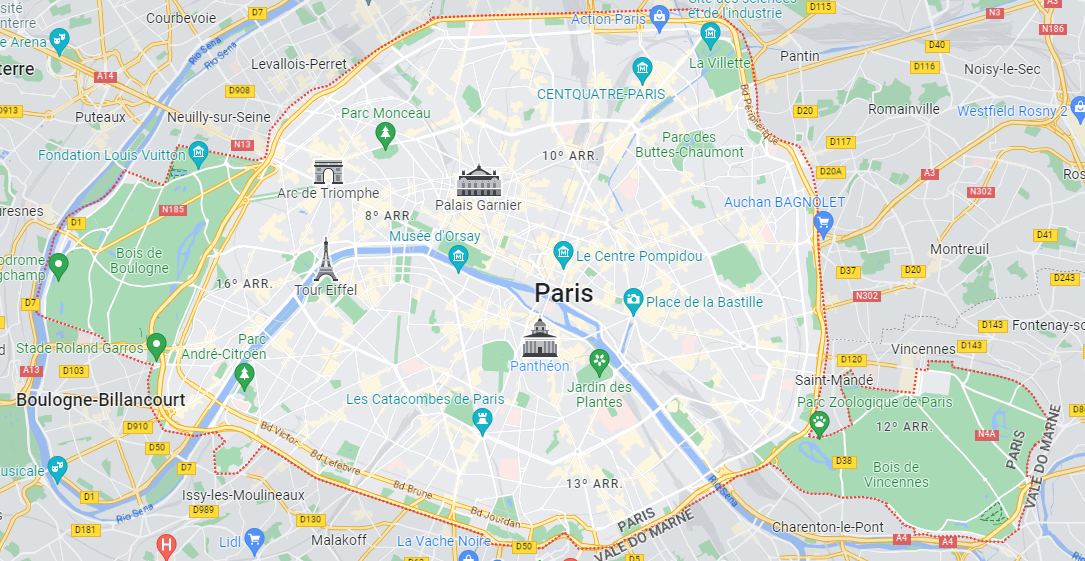

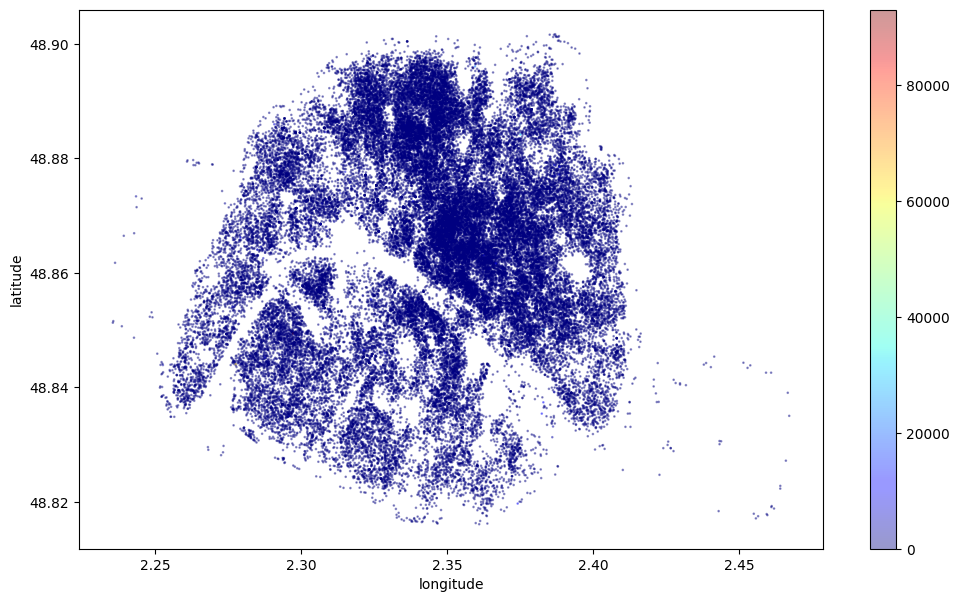

In [15]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=0.8,
              cmap=plt.get_cmap('jet'), figsize=(12,7));

Observando o mapa e a plotagem dos dados, vemos que não tem nenhuma área de Paris é predominante, podemos ver uma concentração um pouco maior no centro, mas nada muito diferente. 

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [16]:
# ver a média da coluna `minimum_nights``

df.minimum_nights.describe().T

count    56726.000000
mean        80.673571
std        145.470062
min          1.000000
25%          2.000000
50%          3.000000
75%         30.000000
max       1000.000000
Name: minimum_nights, dtype: float64

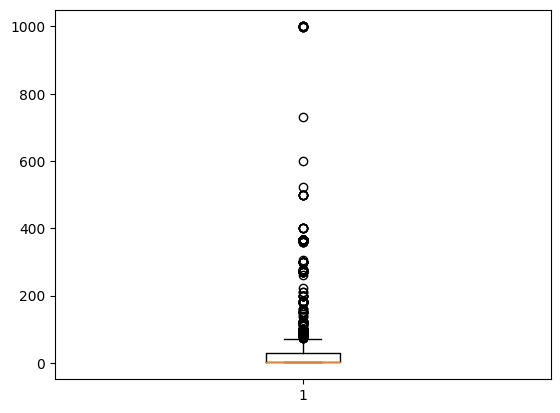

In [17]:
plt.boxplot(data = df, x= 'minimum_nights');

In [21]:
# ver a média por bairro
df.minimum_nights.groupby(by=df['neighbourhood']).mean().sort_values(ascending = False)

neighbourhood
Batignolles-Monceau    102.551448
Buttes-Montmartre       90.854200
Vaugirard               89.886097
Reuilly                 87.387764
Observatoire            86.876442
Popincourt              86.531948
Ménilmontant            86.444409
Gobelins                85.639788
Passy                   85.534016
Buttes-Chaumont         84.577891
Entrepôt                77.208510
Palais-Bourbon          77.150256
Opéra                   76.651179
Panthéon                70.416796
Luxembourg              66.112827
Temple                  63.500190
Élysée                  61.641644
Hôtel-de-Ville          61.039022
Bourse                  51.699711
Louvre                  49.720947
Name: minimum_nights, dtype: float64

In [32]:
#pegando os dados sem os outliers

df_filtrada = df.loc[df['minimum_nights']<=30]
df_filtrada.minimum_nights.describe().T

count    43687.000000
mean         5.188569
std          7.793727
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: minimum_nights, dtype: float64

Vemos que os bairros que são mais caros tem um tempo médio de estadia mais baixo, os dados sem outliers, vemos que a média de estadia em Paris são de 5 dias.

## Conclusões


Em resumo, a análise realizada evidenciou que os anúncios do Airbnb estão espalhados por toda a região de Paris, demonstrando a ampla oferta de acomodações em diferentes áreas da cidade. Essas informações são relevantes para compreender a distribuição geográfica dos anúncios e suas implicações em diversos contextos.

Ao analisar os dados disponíveis, constatamos que os cinco bairros com os maiores preços de acomodações no Airbnb em Paris são todos bairros turísticos. Esses bairros são conhecidos por sua localização privilegiada, próximos a atrações turísticas populares, como o Louvre, a Torre Eiffel, o Palácio de Versalhes e outros pontos turísticos icônicos da cidade. A análise reforça a relação entre a localização turística e os preços das acomodações, indicando que a demanda por acomodações nesses bairros turísticos influencia nos valores praticados pelos anfitriões do Airbnb. Essa informação é relevante para compreender a dinâmica de preços das acomodações em Paris e auxiliar na tomada de decisões relacionadas à escolha de localização e precificação de acomodações no Airbnb na cidade.

O tipo de acomodação que predomia é 'Entire home/apt' com 85% desse conjunto de dados que seria Casa/Apartamento. Essa é uma categoria comum de acomodações oferecidas no Airbnb, que significa que o hóspede terá acesso exclusivo a toda a casa ou apartamento durante a estadia, sem a presença do anfitrião ou de outros hóspedes compartilhando o espaço. É uma opção popular para quem busca privacidade e comodidade durante sua estadia em uma cidade ou destino turístico.

A análise do conjunto de dados revelou que o tempo de estadia em Paris, de acordo com os registros do Airbnb, apresenta uma grande variação, com a presença de muitos outliers e uma dispersão significativa entre os dados. Isso indica que os hóspedes que utilizam o Airbnb em Paris têm diferentes padrões de estadia, com algumas reservas apresentando durações atípicas e fora da média. Essa dispersão nos tempos de estadia pode ser influenciada por uma série de fatores, como o propósito da viagem, a disponibilidade de acomodações de curta duração e as preferências pessoais dos hóspedes. É importante levar em consideração essa variabilidade nos tempos de estadia ao interpretar os dados e ao planejar ações ou estratégias relacionadas à oferta de acomodações no contexto de Paris.

